In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
%matplotlib inline

We import the boston data 

In [3]:
boston=load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.data.shape

(506, 13)

In [6]:
columnNames=boston.feature_names
columnNames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
Data=pd.DataFrame(boston.data,columns=columnNames) 
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
Data_Labels=boston.target # .target have dependent variable
Data_Labels.shape

(506,)

In [9]:
Data["Price"]=Data_Labels 

In [10]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
Data.shape

(506, 14)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(Data,Data["Price"],test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [13]:
x_temp=x_train.drop("Price",axis=1,inplace=False)
x_std=StandardScaler().fit_transform(x_temp)
x=pd.DataFrame(x_std,columns=columnNames)
y=y_train

x_test_temp=x_test.drop("Price",axis=1, inplace=False)
x_test_std= StandardScaler().fit_transform(x_test_temp)
x_te=pd.DataFrame(x_test_std,columns=columnNames)
y_te=y_test

clf=SGDRegressor(shuffle=False,learning_rate='invscaling',max_iter=2500)
clf.fit(x,y)

y_pred=clf.predict(x_te)

print("Weight="+str(clf.coef_))
print("y Intercept="+str(clf.intercept_))

Weight=[-0.90637414  0.8876179  -0.10127685  0.85150429 -1.74256244  2.90103328
 -0.27401483 -2.82577204  2.10141795 -1.85579235 -1.86098175  0.84756816
 -3.29953539]
y Intercept=[22.04599829]


In [14]:
d2 ={'True Labels':y_te,'Predicted Labels':y_pred}
df2=pd.DataFrame(data=d2)
df2

,True Labels,Predicted Labels
230,24.3,22.783937
104,20.1,19.985519
48,14.4,9.102153
210,21.7,22.398449
81,23.9,25.755882
...,...,...
469,20.1,15.074202
351,24.1,20.230572
118,20.4,18.659128
39,30.8,29.851003


In [15]:
Mean_sq_Error=mean_squared_error(y_te,y_pred)
Mean_sq_Error                                

42.445117852673754

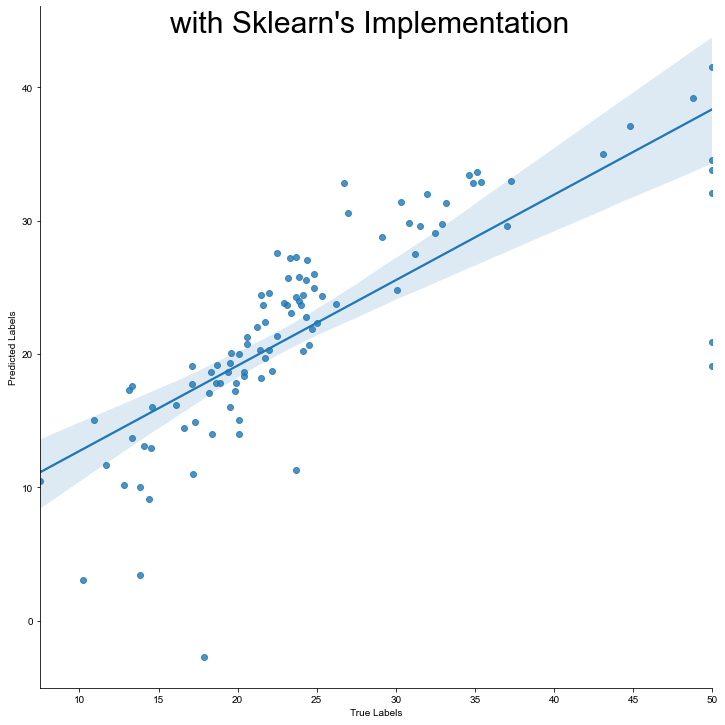

In [16]:
lm2=sns.lmplot(x="True Labels",y="Predicted Labels",data=df2,size=10)
fig2=lm2.fig

#Add a title to the figure
fig2.suptitle("with Sklearn's Implementation",fontsize=30)

sns.set(font_scale=1.5)